<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#数据集" data-toc-modified-id="数据集-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>数据集</a></span></li><li><span><a href="#线性回归" data-toc-modified-id="线性回归-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>线性回归</a></span><ul class="toc-item"><li><span><a href="#RANSAC减小异常点的影响" data-toc-modified-id="RANSAC减小异常点的影响-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>RANSAC减小异常点的影响</a></span></li><li><span><a href="#L1正则化" data-toc-modified-id="L1正则化-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>L1正则化</a></span></li><li><span><a href="#L2正则化" data-toc-modified-id="L2正则化-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>L2正则化</a></span></li><li><span><a href="#回归树" data-toc-modified-id="回归树-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>回归树</a></span></li></ul></li></ul></div>

# 数据集

In [1]:
from sklearn.datasets import load_boston

In [2]:
dataset = load_boston()

In [4]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
import pandas as pd

/Users/yangqj/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/yangqj/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [13]:
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['MEDV'] = pd.Series(dataset.target)

In [14]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
import seaborn as sns

/Users/yangqj/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


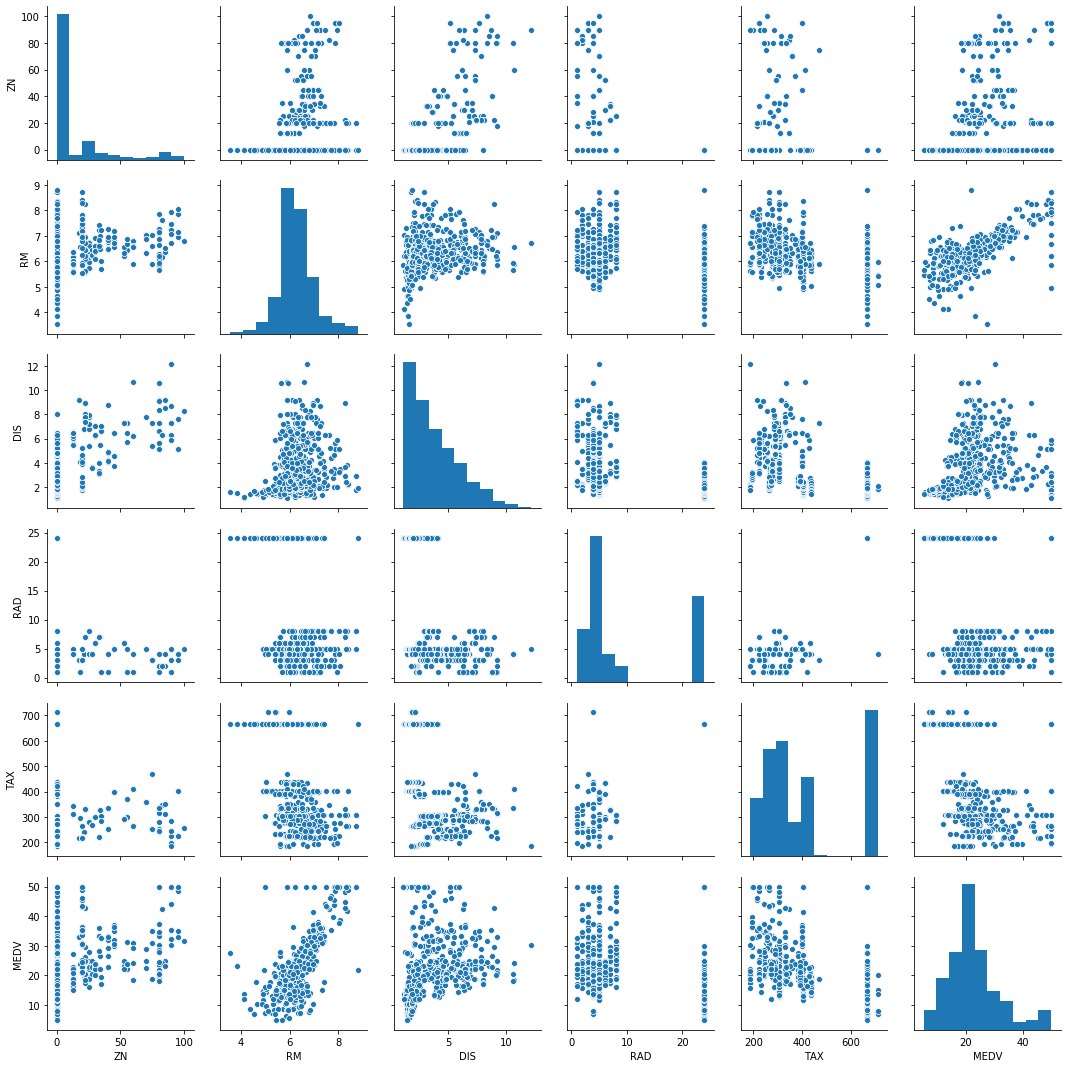

In [18]:
pair_cols = ['ZN', 'RM', 'DIS', 'RAD', 'TAX', 'MEDV']
sns.pairplot(df[pair_cols])

In [21]:
coef = df.corr()
coef

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [35]:
X, y = df.RM.values.reshape(-1, 1), df.MEDV.values.reshape(-1, 1)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
seed = 0

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

# 线性回归

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

In [64]:
def predict_score(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('MSE {:.4f}, r2 {:.4f}'.format(
        mean_squared_error(y_test, y_pred),
        r2_score(y_test, y_pred)))

In [53]:
from matplotlib import pyplot as plt

In [51]:
def plot_predict(model, X, y):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2) 
    plt.xlabel('Average number of rooms [RM]')
    plt.ylabel('Price in $1000\'s [MEDV]')
    plt.tight_layout()
    plt.show()

In [48]:
from sklearn.linear_model import LinearRegression

In [68]:
lr = LinearRegression()
lr.fit(X_train, y_train)
predict_score(lr, X_test, y_test)

MSE 43.4720, r2 0.4679


In [69]:
lr.coef_

array([[9.31294923]])

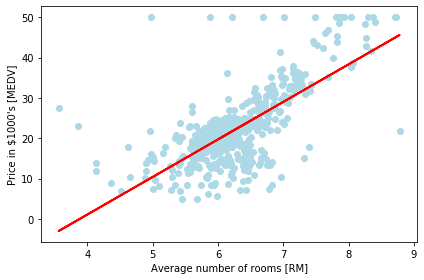

In [70]:
plot_predict(lr, X, y)

## RANSAC减小异常点的影响

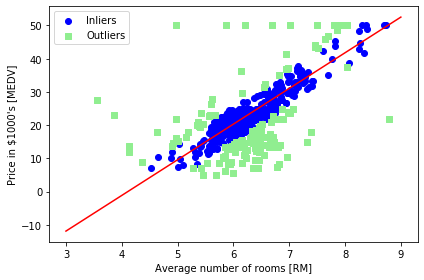

In [71]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_loss', 
                         residual_threshold=5.0, 
                         random_state=0)


ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')   
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./figures/ransac_fit.png', dpi=300)
plt.show()

## L1正则化

In [72]:
from sklearn.linear_model import Lasso

In [80]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
predict_score(lasso, X_test, y_test)

MSE 43.9867, r2 0.4616


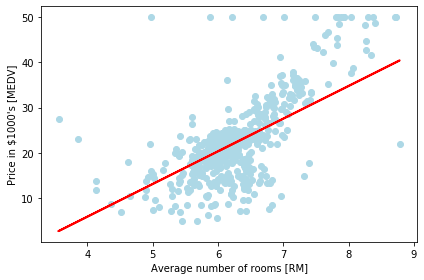

In [74]:
plot_predict(lasso, X, y)

## L2正则化

In [75]:
from sklearn.linear_model import Ridge

In [76]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predict_score(lasso, X_test, y_test)

MSE 43.9867, r2 0.4616


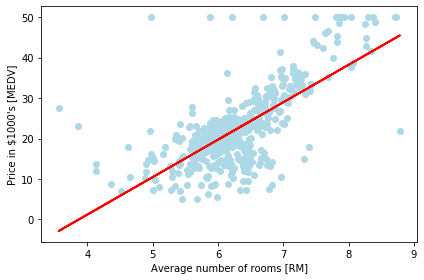

In [77]:
plot_predict(ridge, X, y)

## 回归树

In [82]:
from sklearn.tree import DecisionTreeRegressor

In [85]:
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X_train, y_train)
predict_score(dt, X_test, y_test)

MSE 37.4831, r2 0.5412
